# **Digit Recognition**
> Kaggle Dataset (MNIST Dataset)

## **Download Dataset**

In [ ]:
!kaggle competitions download -c digit-recognizer

100%|██████████████████████████████████████| 15.3M/15.3M [00:09<00:00, 1.71MB/s]
100%|██████████████████████████████████████| 15.3M/15.3M [00:09<00:00, 1.76MB/s]


## **Preparing Library**

In [1]:
# Misc Library
import os
import zipfile

# Pre-processing Library
import pandas as pd
import numpy as np

# Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling Library (Tensorflow Framework)
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, MaxPool2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# Sklearn Library
from sklearn.model_selection import train_test_split

# Warning Ignore
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

## **Data Extraction from Zip file**

In [ ]:
# Mengatur path dari dataset
path_data = "digit-recognizer.zip"

with zipfile.ZipFile(path_data, 'r') as zip_ref:
    zip_ref.extractall('.')

## **Preprocessing Dataset**

In [2]:
data_train = pd.read_csv("/content/train.csv",low_memory=False)
data_test = pd.read_csv("/content/test.csv", low_memory=False)

In [3]:
X_train = data_train.drop('label', axis =1).values
y_train = data_train['label'].values

In [4]:
X_train = X_train.reshape(-1,28,28,1).astype('float32')/255.0
X_Test = data_test.values.reshape(-1,28,28,1).astype('float32')/255.0

In [5]:
data_train['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [6]:
y_train = to_categorical(y_train , 10)

## **Splitting Data**

In [7]:
X_train , X_val , y_train ,y_val =train_test_split(X_train,y_train,test_size=0.2 ,random_state=42)

In [8]:
print(f"Ukuran dari dataset (Data Latih) : {X_train.shape}")
print(f"Ukuran dari dataset (Data Uji): {X_val.shape}")
print(f"Ukuran dari dataset (Label Latih): {y_train.shape}")
print(f"Ukuran dari dataset (Label Uji): {y_val.shape}")

Ukuran dari dataset (Data Latih) : (33600, 28, 28, 1)
Ukuran dari dataset (Data Uji): (8400, 28, 28, 1)
Ukuran dari dataset (Label Latih): (33600, 10)
Ukuran dari dataset (Label Uji): (8400, 10)


## **Model CNN (_Convolutional Neural Network_)**

In [9]:
model = Sequential()

model.add(Conv2D(32, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPool2D(2))
model.add(BatchNormalization())

model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(MaxPool2D(2))
model.add(BatchNormalization())

model.add(Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(MaxPool2D(2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.3))

model.add(Dense(128, kernel_initializer = 'he_normal', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

model.summary()
model.compile(optimizer = Adam(learning_rate = 3e-4), loss = 'categorical_crossentropy' , metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14, 14, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 7, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,442 (947.04 KB)

 Trainable params: 241,994 (945.29 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# model.compile(optimizer=Adam(learning_rate=0.001),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# model.summary()

In [10]:
early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=5,
                               restore_best_weights=True)

## **Training Model with Dataset**

In [11]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    batch_size=64,
                    callbacks=[early_stopping])

Epoch 1/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8027 - loss: 0.6291 - val_accuracy: 0.9755 - val_loss: 0.0771
Epoch 2/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9723 - loss: 0.0949 - val_accuracy: 0.9821 - val_loss: 0.0561
Epoch 3/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9835 - loss: 0.0547 - val_accuracy: 0.9854 - val_loss: 0.0443
Epoch 4/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9876 - loss: 0.0383 - val_accuracy: 0.9860 - val_loss: 0.0471
Epoch 5/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9894 - loss: 0.0314 - val_accuracy: 0.9885 - val_loss: 0.0388
Epoch 6/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9920 - loss: 0.0225 - val_accuracy: 0.9893 - val_loss: 0.0373
Epoch 7/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9932 - loss: 0.0204 - val_accuracy: 0.9894 - val_loss: 0.0344
Epoch 8/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9947 - loss: 0.0165 - val_acc

## **Model Evaluation**

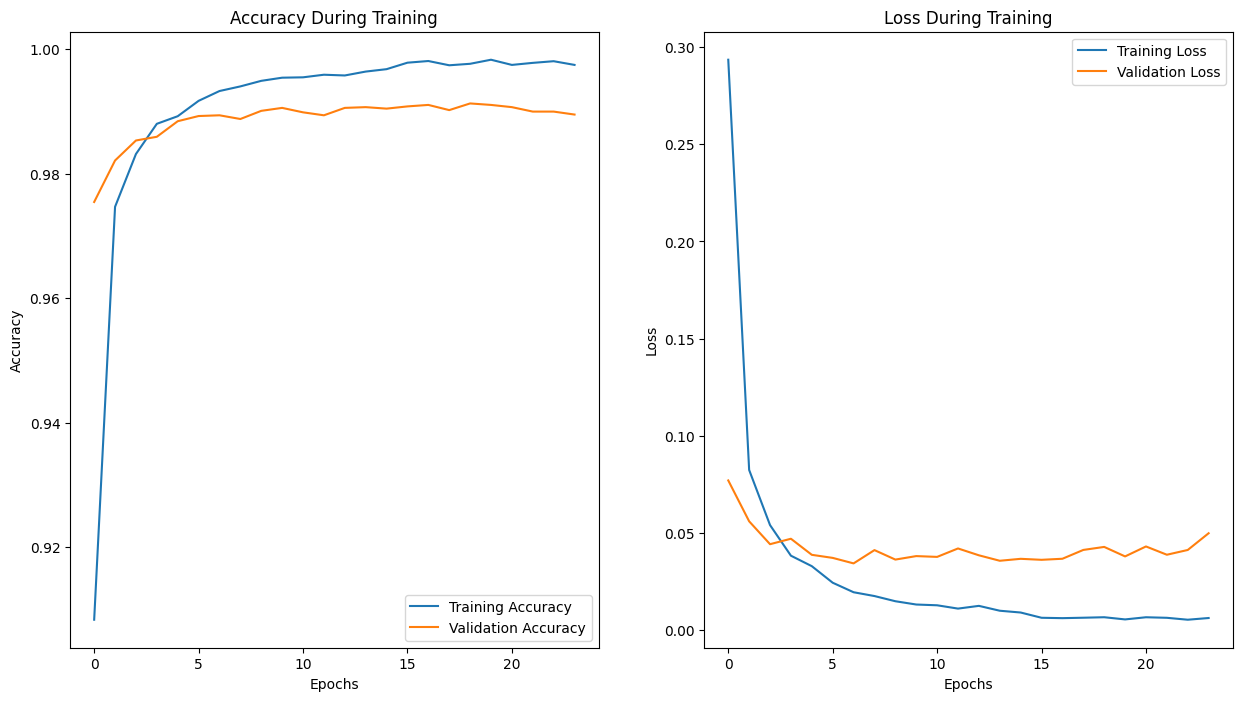

In [12]:
plt.figure(figsize=(15,8))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy During Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [13]:
y_pred = model.predict(X_Test)
y_pred

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


array([[1.09304452e-14, 1.05973735e-16, 1.00000000e+00, ...,
        2.05384711e-12, 4.23588387e-15, 5.66948798e-17],
       [1.00000000e+00, 4.97854633e-13, 4.32623437e-10, ...,
        5.95070868e-11, 2.96617630e-13, 1.00717579e-12],
       [2.07540365e-12, 2.13055962e-10, 5.07053510e-10, ...,
        1.96335606e-07, 1.29048749e-06, 9.99998212e-01],
       ...,
       [1.77884334e-20, 1.08208724e-15, 5.55979298e-15, ...,
        2.61559115e-16, 5.54034967e-14, 6.62068124e-14],
       [2.40379661e-11, 4.14113535e-11, 1.58009147e-10, ...,
        3.72131090e-08, 5.83378346e-10, 9.99995112e-01],
       [1.58722766e-18, 2.18507245e-18, 1.00000000e+00, ...,
        7.79737535e-15, 3.11958548e-13, 1.60675843e-18]], dtype=float32)

In [14]:
predicted_label = np.argmax(y_pred, axis=1)

In [15]:
predicted_label.shape

(28000,)

## **Submit Submission**

In [16]:
sampel_submission = pd.read_csv('sample_submission.csv')
sampel_submission

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [17]:
sampel_submission['Label'] = predicted_label

In [18]:
sampel_submission.to_csv('Submission_Final.csv', index=False)
print('Submission Files Created!')

Submission Files Created!
